# Clustering for Customer Segmentation

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

The most common ways in which businesses segment their customer base are:
1. Demographic information, such as gender, age, familial and marital status, income, education, and occupation.
2. Geographical information, which differs depending on the scope of the company. For localized businesses, this info might pertain to specific towns or counties. For larger companies, it might mean a customer’s city, state, or even country of residence.
3. Psychographics, such as social class, lifestyle, and personality traits.
4. Behavioral data, such as spending and consumption habits, product/service usage, and desired benefits.

Advantages of Customer Segmentation
1. Determine appropriate product pricing.
2. Develop customized marketing campaigns.
3. Design an optimal distribution strategy.
4. Choose specific product features for deployment.
5. Prioritize new product development efforts.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

We are using the data from the Mall Customer Segmentation Data competition held on Kaggle.

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')

In [3]:
df.head(5).style.hide(axis="index")

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.drop(["CustomerID"], axis = 1, inplace=True)


Now we will have a short look on how the data looks like:

First we will have a glimpse on how the age of the customers is distributed

In [5]:
df.describe().T.style \
    .format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
Age,200.00,38.85,13.97,18.00,28.75,36.00,49.00,70.00
Annual Income (k$),200.00,60.56,26.26,15.00,41.50,61.50,78.00,137.00
Spending Score (1-100),200.00,50.20,25.82,1.00,34.75,50.00,73.00,99.00


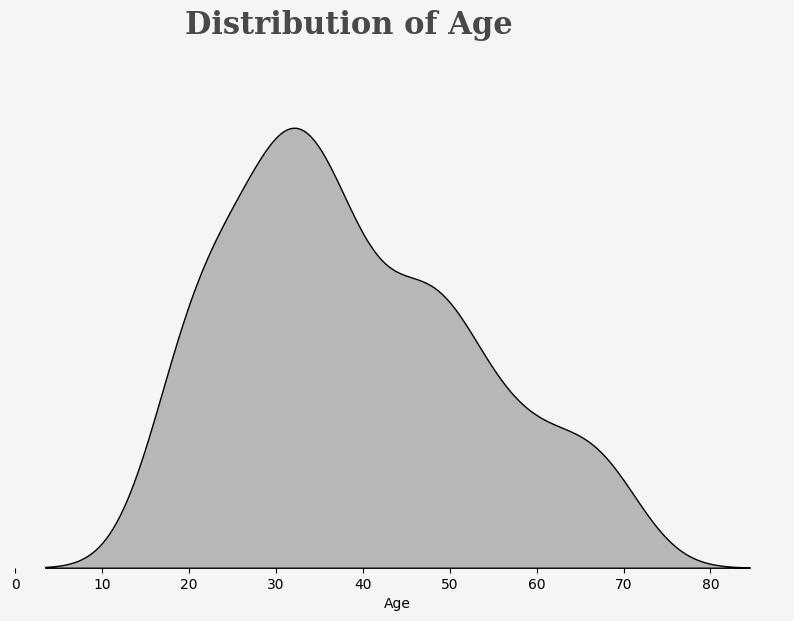

In [6]:
fig=plt.figure(figsize=(10,6))

ax=sns.kdeplot(df["Age"],color="black",fill=True)

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.text(0.3,1,"Distribution of Age", {'font': 'Serif','weight':'bold', 'size': '22','color':'black'}, alpha = 0.7)

fig.show()

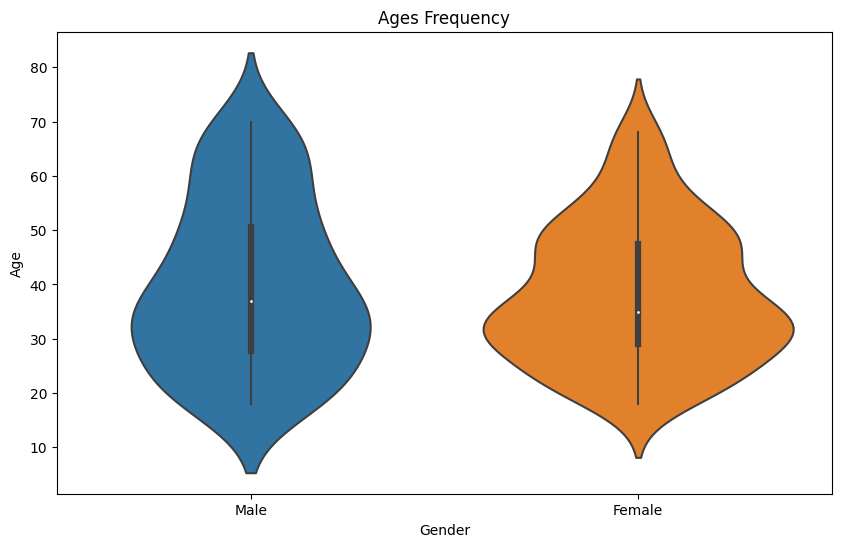

In [7]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(data=df,x="Gender", y="Age")
plt.show()

Most of the customers are in their 30s. But how are the genders distributed?

In [8]:
x = df['Gender'].value_counts()
#print(x)
x_male_percentage = int(x['Male']/len(df) * 100)
x_female_percentage = int(x['Female']/len(df) * 100)
print(f'Male: {x_male_percentage}%\nFemale: {x_female_percentage}%' )

Male: 44%
Female: 56%


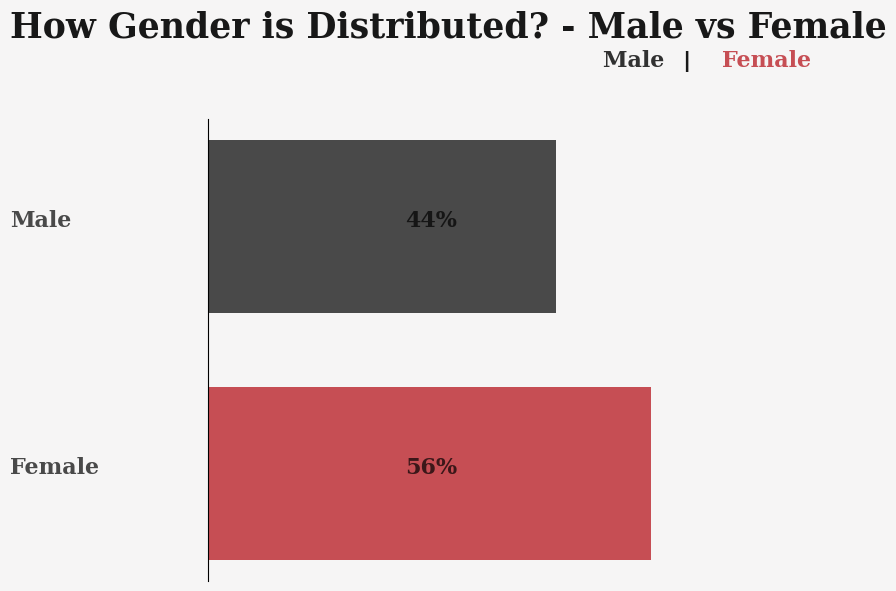

In [9]:
#print(x)
fig,ax=plt.subplots(figsize=(6,6))
ax.barh([1],x.values[1],height=0.7,color='black',alpha=0.7)
plt.text(-50,1, 'Male', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(50,1, f'{x_male_percentage}%', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)



ax.barh([0],x.values[0],height=0.7,color='#b20710',alpha=0.7)
plt.text(-50,0, 'Female', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(50,0, f'{x_female_percentage}%', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-50,1.77, 'How Gender is Distributed? - Male vs Female' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)
plt.text(100,1.65, 'Male ', {'font': 'Serif','weight':'bold','size': '16', 'color':'black'}, alpha = 0.8)
plt.text(120,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'}, alpha = 0.9)
plt.text(130,1.65, 'Female', {'font': 'Serif','weight':'bold', 'size': '16','color':'#b20710'}, alpha = 0.7)


fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

There are slightly more female customers than male.

Now we will look at the Annual Income and the Spending Score of the customers.

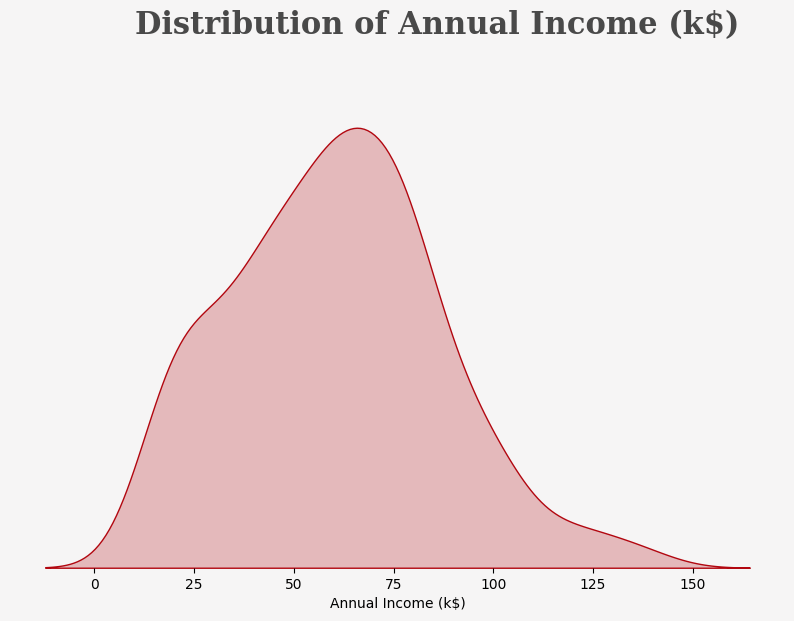

In [10]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(df["Annual Income (k$)"],color="#b20710",fill=True)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
fig.text(0.25,1,"Distribution of Annual Income (k$)", {'font': 'Serif','weight':'bold', 'size': '22','color':'black'}, alpha = 0.7)

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

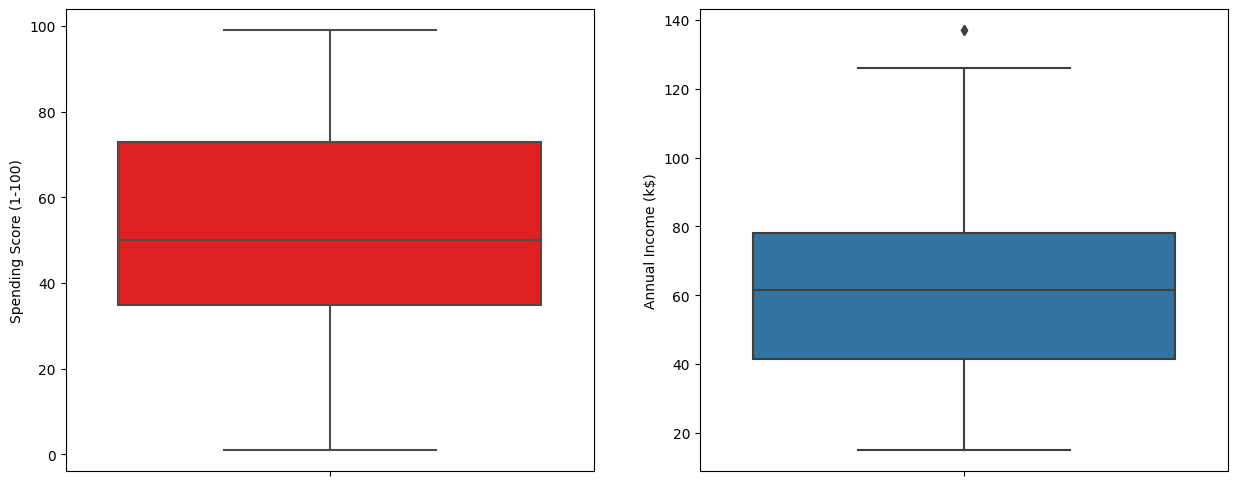

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

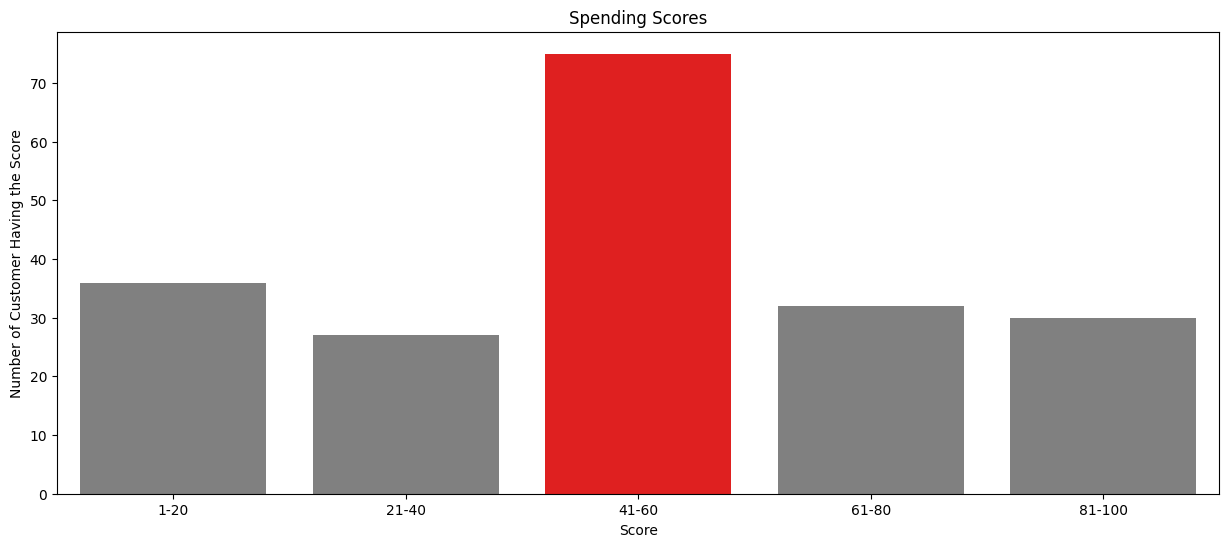

In [12]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette=['grey', 'grey','red','grey','grey'])
ax.set_facecolor('#f5f6f6')
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

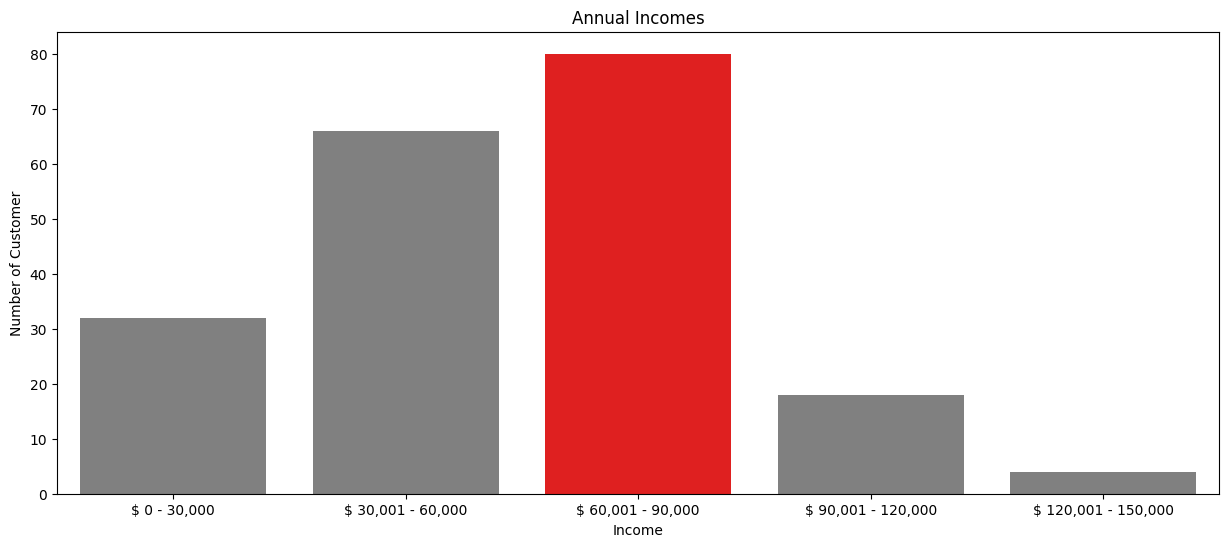

In [13]:

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette=['grey', 'grey','red','grey','grey'])
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

We can see that the most customers earn between $ 60.000 \$ $ and $ 90.000 \$ $ a year and have a spending score between 41 and 60. Let's now plot the annual income against the spending score:

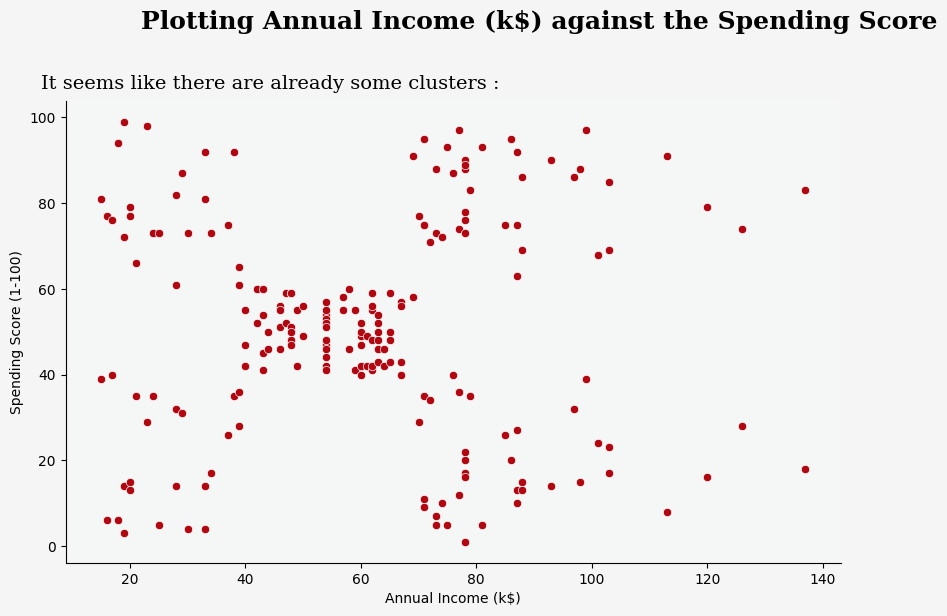

In [14]:
fig=plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],color="#b20710")

fig.patch.set_facecolor('#f6f5f5')

ax.set_facecolor('#f5f6f6')
for loc in ['right', 'top']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.2,1,"Plotting Annual Income (k$) against the Spending Score",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"It seems like there are already some clusters :",**{'font':'serif', 'size':14,}, alpha = 1)


fig.show()

It seems like that there are some groups of customers. Let's have a look at that with a clustering algorithm.

## Clustering the Customer Data

We will cluster the data by Annual Income (k$) and Spending Score. So first we will create an array that only contains this two elements.

In [15]:
#print(df.head())
x = df.iloc[:, [2, 3]].values

Now we will use the Elbow Method to get the best number of clusters. We saw in the plot above that the data already shows 5 clusters so we will use the Elbow Method in this case to validate the number of clusters we expect.

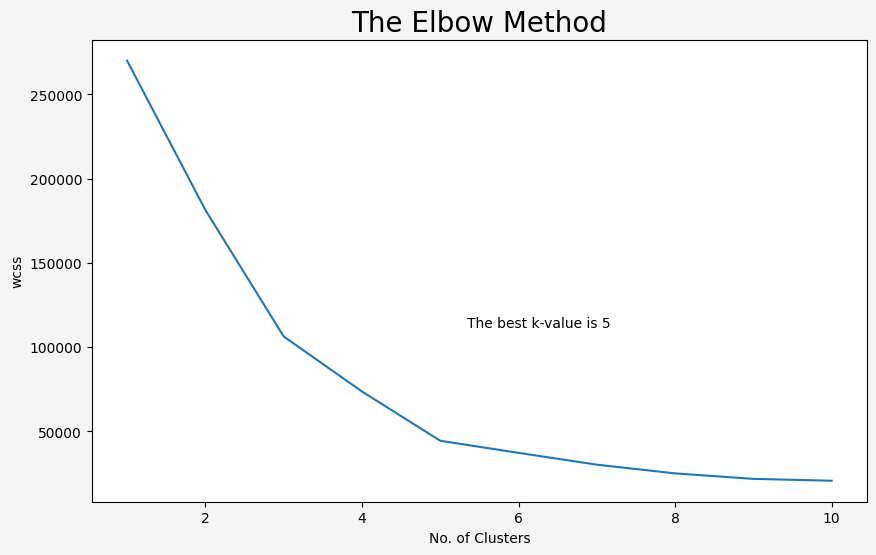

In [16]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
fig=plt.figure(figsize=(10,6))  
fig.patch.set_facecolor('#f6f5f5')

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
fig.text(0.5,0.4,"The best k-value is 5")
plt.show()

The best number of clusters we derive from the elbow method seems to be 5, which coincides with the number of clusters we can see when we plot the Annual Income (k$) against the Spending Score. So we will choose n_clusters = 5 for our kMeans model. So lets train the model and predict the clusters.

In [17]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
print(y_means)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


For a quick overview how the clusters look like we can create a pandas series with the clusters and concatenate it onto the original dataset and print some samples for each cluster.

In [18]:
df_cluster = pd.Series(y_means, name='Cluster')
print(df_cluster)

0      4
1      3
2      4
3      3
4      4
      ..
195    2
196    0
197    2
198    0
199    2
Name: Cluster, Length: 200, dtype: int32


In [19]:
df_clustered = pd.concat([df, df_cluster], axis=1)

In [20]:
for i in range(5):
    print(df_clustered[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].query(f'Cluster == {i}').sample(4))

     Annual Income (k$)  Spending Score (1-100)  Cluster
160                  79                      35        0
168                  87                      27        0
138                  74                      10        0
170                  87                      13        0
     Annual Income (k$)  Spending Score (1-100)  Cluster
106                  63                      50        1
82                   54                      41        1
53                   43                      60        1
81                   54                      55        1
     Annual Income (k$)  Spending Score (1-100)  Cluster
181                  97                      86        2
147                  77                      74        2
163                  81                      93        2
191                 103                      69        2
    Annual Income (k$)  Spending Score (1-100)  Cluster
15                  20                      79        3
39                  37           

And now lets plot our cluster:

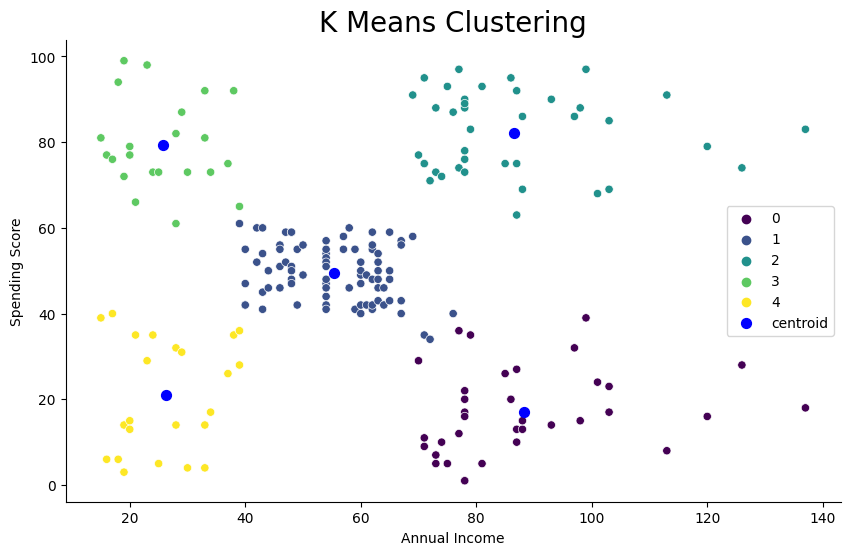

In [21]:
fig=plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"], palette='viridis', hue=df_clustered['Cluster'])

for loc in ['right', 'top']:
    ax.spines[loc].set_visible(False)
 

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

So we see that there are 5 groups of customer:

1. Low income with low spending score.
2. Low income with high spending score.
3. Average income with average spending score.
4. High income with low spending score.
5. High income with high spending score.

So of course our target group is the high income with high spending score. But we can now also think about how we get the high income with low spending score into the high spending group and conduct targeted marketing campaign. So who is in this group?

In [22]:
df_high_income_low_spending = df_clustered[['Age','Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].query('Cluster == 0')

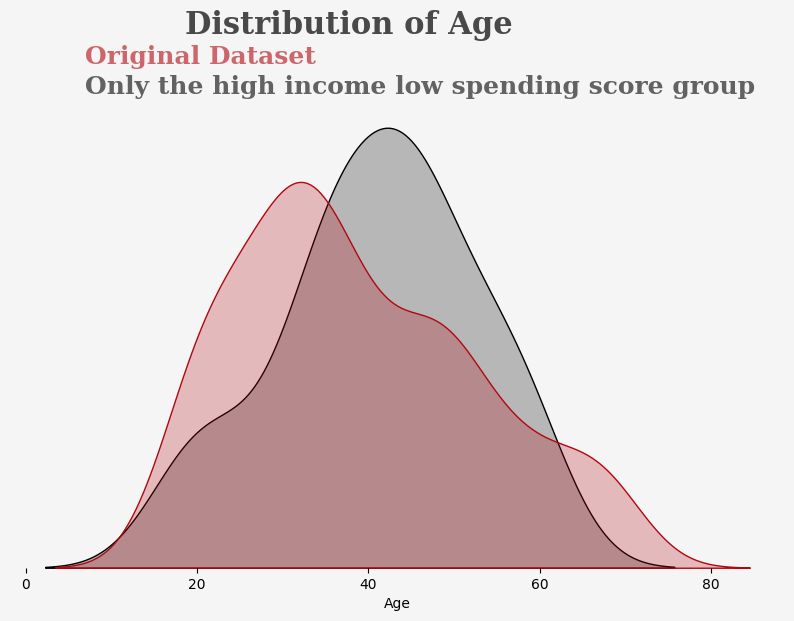

In [23]:
fig=plt.figure(figsize=(10,6))

ax=sns.kdeplot(df_high_income_low_spending["Age"],color="black",fill=True)
ax=sns.kdeplot(df["Age"],color="#b20710",fill=True)

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.text(0.3,1,"Distribution of Age", {'font': 'Serif','weight':'bold', 'size': '22','color':'black'}, alpha = 0.7)
fig.text(0.2,0.95,"Original Dataset",**{'font':'serif', 'size':18,'weight':'bold','color':'#b20710'}, alpha = 0.6)
fig.text(0.2,0.90,"Only the high income low spending score group",**{'font':'serif', 'size':18,'weight':'bold','color':'black'}, alpha = 0.6)

fig.show()

Let's look at the gender distribution in the high income, low spending cluster.

In [24]:
x_gender = df_high_income_low_spending['Gender'].value_counts()
x_male_percentage = int(x_gender['Male']/len(df_high_income_low_spending) * 100)
x_female_percentage = int(x_gender['Female']/len(df_high_income_low_spending) * 100)
print(f'Male: {x_male_percentage}%\nFemale: {x_female_percentage}%' )

Male: 54%
Female: 45%


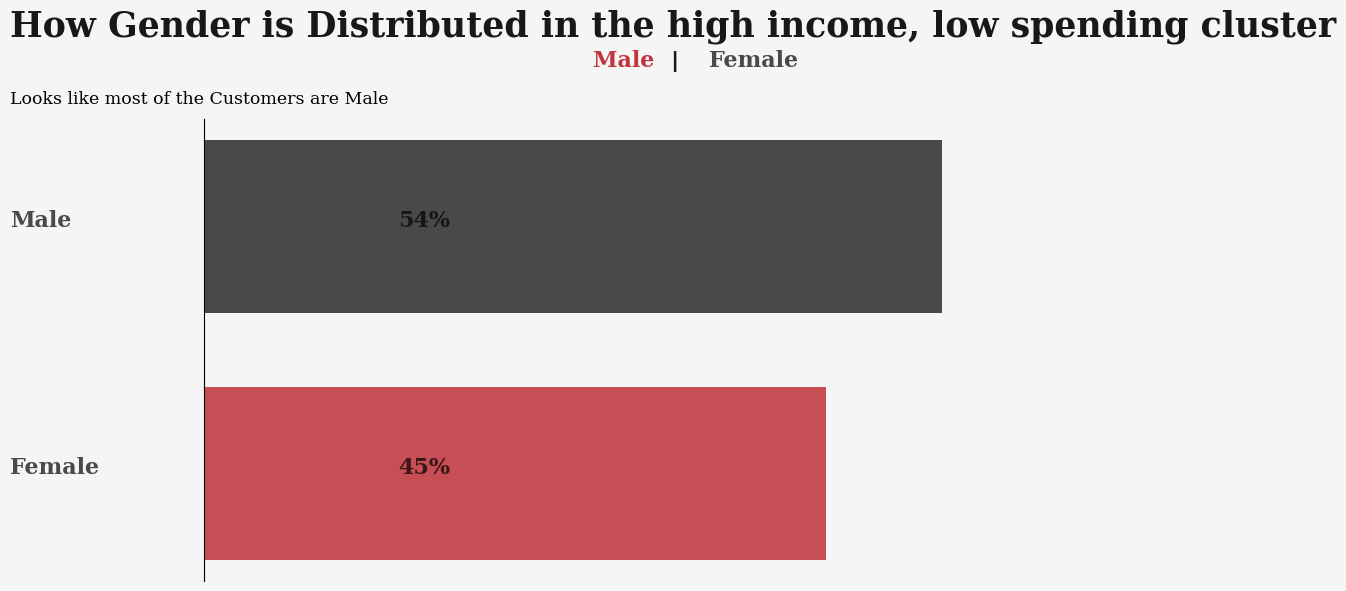

In [25]:
fig,ax=plt.subplots(figsize=(10,6))
ax.barh([1],x_gender.values[0],height=0.7,color='black',alpha=0.7)
plt.text(-5,1, 'Male', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(5,1, f'{x_male_percentage}%', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)



ax.barh([0],x_gender.values[1],height=0.7,color='#b20710',alpha=0.7)
plt.text(-5,0, 'Female', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(5,0, f'{x_female_percentage}%', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-5,1.77, 'How Gender is Distributed in the high income, low spending cluster' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)
plt.text(10,1.65, 'Male ', {'font': 'Serif','weight':'bold','size': '16', 'color':'#b20710'}, alpha = 0.8)
plt.text(12,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'}, alpha = 0.9)
plt.text(13,1.65, 'Female', {'font': 'Serif','weight':'bold', 'size': '16','color':'black'}, alpha = 0.7)
plt.text(-5,1.5, 'Looks like most of the Customers are Male', 
        {'font':'Serif', 'size':'12.5','color': 'black'})


fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

We can see that this group is on average older compared to the whole data set and that there are proportionally more men in this group than the whole data set.

Exercise: What happens when we include the age and the gender into the clustering, do you still see clusters? If yes how are they composed? Feel free to visualize the results using different pairwise feature combinations or even using a 3D plot. 

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
..      ...  ...                 ...                     ...
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]


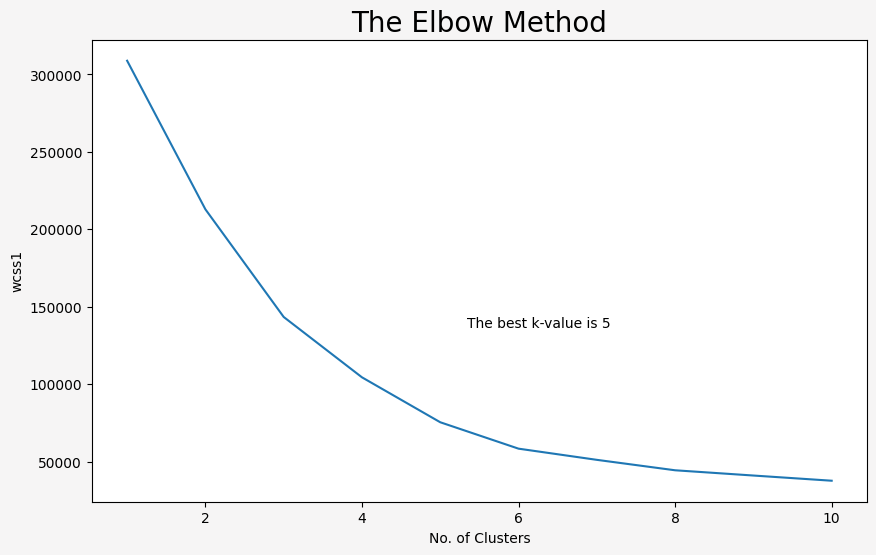

In [26]:
df1 = df
df1['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
print(df1)
#df1.drop(["CustomerID"],axis=1)
#print(df1.head())
wcss1 = []
for i in range(1, 11):
    km1 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km1.fit(df1)
    wcss1.append(km1.inertia_)
fig=plt.figure(figsize=(10,6))  
fig.patch.set_facecolor('#f6f5f5')

plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss1')
fig.text(0.5,0.4,"The best k-value is 5")
plt.show()

In [27]:
km1 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means1 = km1.fit_predict(df1)
#print(y_means1)

In [28]:
df_cluster1 = pd.Series(y_means1, name='Cluster')
#print(df_cluster1)
df_clustered1 = pd.concat([df1, df_cluster1], axis=1)
print(df_clustered1)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0         1   19                  15                      39        0
1         1   21                  15                      81        4
2         0   20                  16                       6        0
3         0   23                  16                      77        4
4         0   31                  17                      40        0
..      ...  ...                 ...                     ...      ...
195       0   35                 120                      79        1
196       0   45                 126                      28        3
197       1   32                 126                      74        1
198       1   32                 137                      18        3
199       1   30                 137                      83        1

[200 rows x 5 columns]


In [29]:
for i in range(5):
    print(df_clustered1[['Annual Income (k$)', 'Spending Score (1-100)','Gender','Age', 'Cluster']].query(f'Cluster == {i}').sample(4))

    Annual Income (k$)  Spending Score (1-100)  Gender  Age  Cluster
36                  34                      17       0   42        0
12                  20                      15       0   58        0
6                   18                       6       0   35        0
2                   16                       6       0   20        0
     Annual Income (k$)  Spending Score (1-100)  Gender  Age  Cluster
123                  69                      91       1   39        1
193                 113                      91       0   38        1
173                  87                      92       1   36        1
147                  77                      74       0   32        1
    Annual Income (k$)  Spending Score (1-100)  Gender  Age  Cluster
61                  46                      55       1   19        2
78                  54                      52       0   23        2
56                  44                      50       0   51        2
83                  54       

In [30]:
from mpl_toolkits.mplot3d import Axes3D

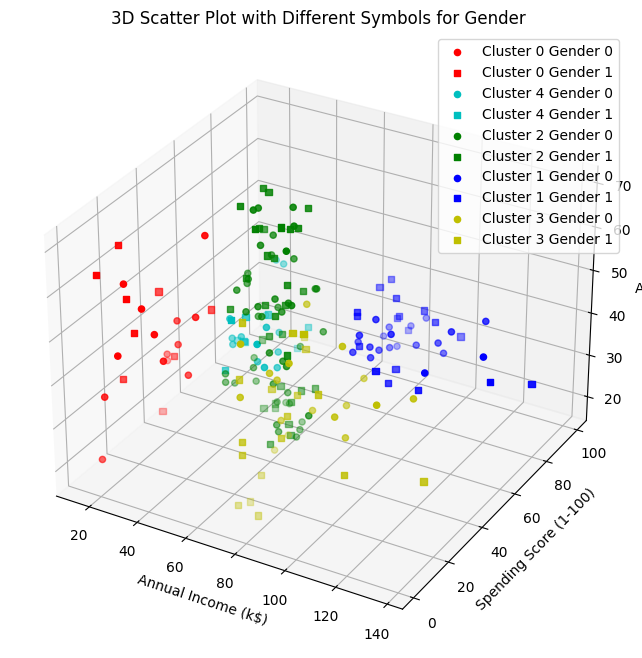

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 定义颜色和符号
colors = {0: 'r', 1: 'b', 2: 'g', 3: 'y', 4: 'c'}
markers = {0: 'o', 1: 's'}  # 0代表女性用圆形, 1代表男性用方形

# 绘制数据点
for cluster in df_clustered1['Cluster'].unique():
    for gender in [0, 1]:  # 0为女性，1为男性
        subset = df_clustered1[(df_clustered1['Cluster'] == cluster) & (df_clustered1['Gender'] == gender)]
        ax.scatter(
            subset['Annual Income (k$)'],
            subset['Spending Score (1-100)'],
            subset['Age'],
            c=colors[cluster],
            marker=markers[gender],
            label=f'Cluster {cluster} Gender {gender}'
        )

# 设置轴标签和标题
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('3D Scatter Plot with Different Symbols for Gender')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()


In [36]:
import plotly.express as px


# 定义颜色和符号
symbols = {0: 'circle', 1: 'x'}  # 0代表女性用圆形, 1代表男性用方形

# 添加Symbol列用于绘图
df_clustered1['Symbol'] = df_clustered1['Gender'].map(symbols)
print(df_clustered1['Symbol'])
# 创建3D散点图
fig = px.scatter_3d(df_clustered1, 
                    x='Annual Income (k$)', 
                    y='Spending Score (1-100)', 
                    z='Age',
                    color='Cluster',
                    symbol='Symbol',
                    title='3D Scatter Plot with Different Symbols for Gender')

# 显示图形
fig.show()

0           x
1           x
2      circle
3      circle
4      circle
        ...  
195    circle
196    circle
197         x
198         x
199         x
Name: Symbol, Length: 200, dtype: object


In [ ]:
###########K—means clustering 选择K值 绘制Elbow metric
df1 = df
df1['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
print(df1)
#df1.drop(["CustomerID"],axis=1)
#print(df1.head())
wcss1 = []
for i in range(1, 11):
    km1 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km1.fit(df1)
    wcss1.append(km1.inertia_)
fig=plt.figure(figsize=(10,6))  
fig.patch.set_facecolor('#f6f5f5')

plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss1')
fig.text(0.5,0.4,"The best k-value is 5")
plt.show()

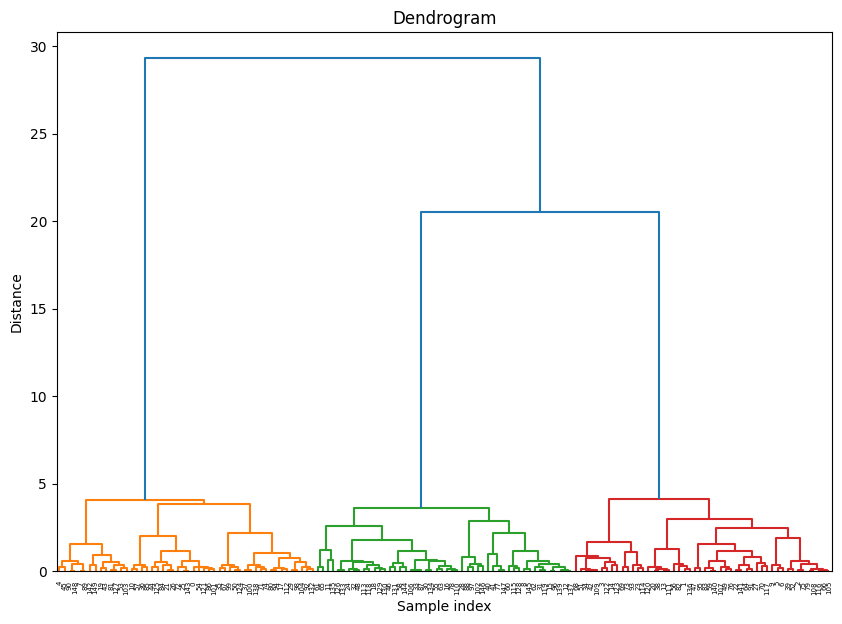

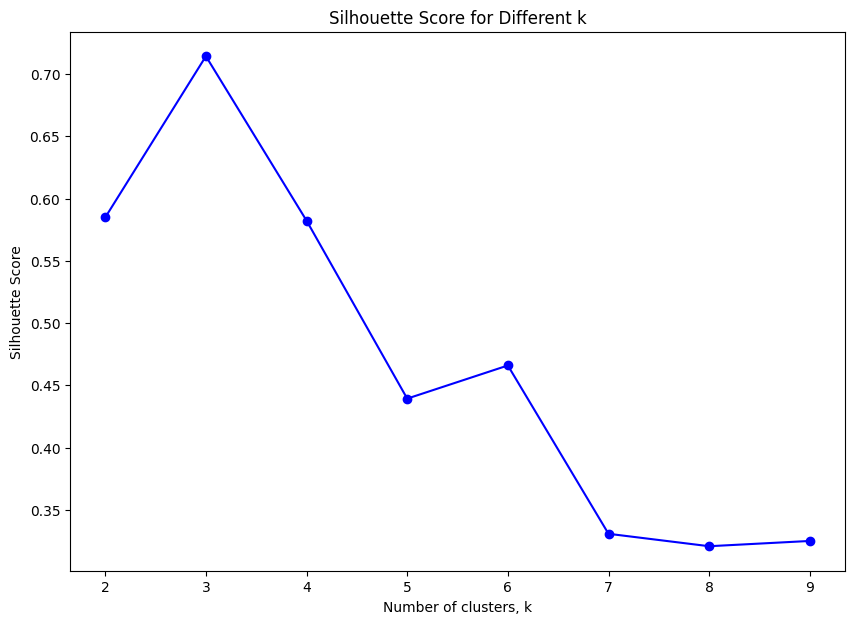

In [1]:
########Hierarchical clustering(层次聚类算法)中绘制树状图和轮廓图选择k值的示例：
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# 生成样本数据
X, _ = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 计算层次聚类的链接矩阵
Z = linkage(X, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 确定不同簇数的轮廓系数
silhouette_scores = []
K = range(2, 10)

for k in K:
    cluster_labels = fcluster(Z, k, criterion='maxclust')
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 绘制轮廓系数图
plt.figure(figsize=(10, 7))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()


In [ ]:
#### DBscan中如何选择半径：计算每个点到其最近 k 个邻居的距离，k 通常设置为 min_samples 值。对所有点按降序排列这些距离。绘制 k-距离图，横轴是点的索引，纵轴是对应的 k-距离。寻找图中的“膝点”或“拐点”，该点通常对应于较好的 eps 值。
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 假设 X 是你的数据集
nearest_neighbors = NearestNeighbors(n_neighbors=4)  # 这里 n_neighbors = min_samples - 1
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)

# 将距离进行排序
distances = np.sort(distances[:, 3], axis=0)  # 选择第 min_samples 个距离
plt.plot(distances)
plt.xlabel('Data points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

